# MIT Parco Macchine - Vetture "Eco-friendly"

## Data cleaning


Il Ministero dei Trasporti pubblica in formato aperto i dati relativi al parco macchine circolante e le patenti di guida regione per regione.


### Parco circolante veicoli
- [Parco Circolante](http://dati.mit.gov.it/catalog/dataset/parco-circolante-dei-veicoli)

Questo dataset contiene il parco circolante dei veicoli su strada ( categorie Autoveicoli e Motoveicoli ) diviso per regione estratto dall'archivio nazionale dei veicoli gestito dalla Motorizzazione.

I dati si riferiscono alla situazione del parco vetture al 31/10/2017

### Patenti di guida

- [Patenti di guida](http://dati.mit.gov.it/catalog/dataset/patenti)

Descrizione: Il dataset contiene l'elenco delle patenti di guida attive, ossia delle autorizzazioni amministrative alla guida di autoveicoli e motoveicoli, provenienti dall'archivio nazionale abilitati alla guida su strada gestito dalla Motorizzazione.

I dati si riferiscono alla situazione dell'archivio dei conducenti al 26/05/2017

### Auto Eco friendly
In questa analisi esplorativa vogliamo esplorare la situazione relativa al parco macchine "Eco friendly" italiano.

Questo primo notebook si occupa quindi di caricare tutti i dati del parco macchine regione per regione, eseguire alcune operazioni di utilità ed infine estratte un unico dataframe con solamente le auto che appartengono alle categorie scelte.

in particolare verrà filtrato il campo "tipo veicolo" con il valore "A" (autoveicolo) e il campo "alimentazione" per i seguenti valori

Descrivere bene con elenco le categorie che sono state prese.

#### Domande:

- quante sono gli autoveicoli, le auto circolanti in italia
- verificare la distribuzione geografica (se le elettriche sono soprattutto in città)
- rifornimento elettrico
 
- quante per abitante
- ripartizione per tipo_alimentazione
- ripartizione per data immatricolazione 
- ripartizione per classe euro
- focus su verdi
- auto elettriche:
    - che % rappresentano?
    - che anno di immatricolazione ?
    - che tipo di destinazione hanno?
    - che tipologia sono, quali sono e dove si trovano?
    - c'è correlazione con età del possessore
    - che incentivi?
    
   
in generale abbiamo stat europee?   

In [2]:

%matplotlib inline
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Seaborn for pairplots
sns.set_context('talk', font_scale=1.2);

## Auto ecologiche
### Part 1: Loading and Cleaning with Pandas - quick checks Parco macchine


Nota: portare data_immatricolazione e togliere:
- tipo_veicolo 
- progressivo

da salvataggio precedente


B/GPL è da usare?

In [10]:
eco = pd.read_csv("../data/output/auto_eco.csv", sep="\t")
len(eco)

4247580

In [11]:
eco.head(10)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
0,1647844,4927106,A,AUTOCARAVAN,PROPRIO,PALIZZI,REGGIO DI CALABRIA,CALABRIA,62.000,M,FORD,1993.000,B/GPL,55.000,0.000,nan,2390.000,N,S
1,1647309,82688,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASALI DEL MANCO,COSENZA,CALABRIA,42.000,M,FIAT - INNOCENTI,1596.000,B/MET,76.000,3.000,214.000,2050.000,N,N
2,1647404,1631179,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,DIAMANTE,COSENZA,CALABRIA,89.000,F,CHEVROLET,1399.000,B/GPL,61.000,3.000,175.000,1500.000,N,N
3,1647422,1779267,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,COSENZA,COSENZA,CALABRIA,39.000,M,MAZDA,2967.000,B/GPL,145.000,3.000,305.000,2075.000,N,N
4,1647438,1989672,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,26.000,M,ALFA ROMEO,1368.000,B/GPL,88.000,6.000,133.000,1820.000,S,S
5,1647445,2113456,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CROTONE,CROTONE,CALABRIA,51.000,F,SUZUKI,1586.000,B/GPL,79.000,4.000,159.000,1650.000,S,S
6,1647508,2901243,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,SETTINGIANO,CATANZARO,CALABRIA,50.000,F,NISSAN,1240.000,B/GPL,48.000,4.000,139.000,1475.000,S,S
7,1647525,3131100,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,85.000,M,FIAT - INNOCENTI,1108.000,B/MET,37.000,0.000,nan,1200.000,S,S
8,1647531,3238042,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASABONA,CROTONE,CALABRIA,70.000,M,SUZUKI,1590.000,B/GPL,55.000,0.000,nan,1450.000,S,S
9,1647562,3651121,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,AMANTEA,COSENZA,CALABRIA,49.000,F,OPEL,1598.000,B/GPL,74.000,4.000,175.000,1855.000,S,S


In [25]:
eco.dtypes

id                                  int64
progressivo                         int64
tipo_veicolo                       object
destinazione                       object
uso                                object
comune_residenza                   object
provincia_residenza                object
regione_residenza                  object
eta_intestatario                  float64
sesso                              object
marca                              object
cilindrata                         object
alimentazione                      object
kw                                float64
data_immatricolazione      datetime64[ns]
classe_euro                       float64
emissioni_co2                      object
massa_complessiva                 float64
revisione_in_regola                object
assicurazione_in_regola            object
dtype: object

In [12]:
eco.alimentazione.value_counts()

B/GPL                       2960781
B/MET                        990240
IBRIDO BENZINA/ELETTRICO     170876
METANO                       108571
ELETTR                        12512
IBRIDO GASOLIO/ELETTRICO       3778
GPL                             822
Name: alimentazione, dtype: int64

In [13]:
eco.head(5)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
0,1647844,4927106,A,AUTOCARAVAN,PROPRIO,PALIZZI,REGGIO DI CALABRIA,CALABRIA,62.000,M,FORD,1993.000,B/GPL,55.000,0.000,nan,2390.000,N,S
1,1647309,82688,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASALI DEL MANCO,COSENZA,CALABRIA,42.000,M,FIAT - INNOCENTI,1596.000,B/MET,76.000,3.000,214.000,2050.000,N,N
2,1647404,1631179,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,DIAMANTE,COSENZA,CALABRIA,89.000,F,CHEVROLET,1399.000,B/GPL,61.000,3.000,175.000,1500.000,N,N
3,1647422,1779267,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,COSENZA,COSENZA,CALABRIA,39.000,M,MAZDA,2967.000,B/GPL,145.000,3.000,305.000,2075.000,N,N
4,1647438,1989672,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,26.000,M,ALFA ROMEO,1368.000,B/GPL,88.000,6.000,133.000,1820.000,S,S


In [14]:
print(eco.shape)

(4247580, 19)


In [15]:
eco.describe()

,id,progressivo,eta_intestatario,cilindrata,kw,classe_euro,emissioni_co2,massa_complessiva
count,4247580.000,4247580.000,3963131.000,4235986.000,4247204.000,4247580.000,3570456.000,4247468.000
mean,24714964.581,27652909.117,53.200,1409.285,64.680,3.958,130.817,1645.733
std,15453508.624,15579963.048,14.266,463.169,22.796,1.603,31.473,706.432
min,36.000,1.000,4.000,0.000,0.000,0.000,0.000,1.000
25%,10475230.000,13378633.750,43.000,1242.000,51.000,4.000,114.000,1440.000
50%,24696977.500,28961898.500,53.000,1368.000,59.000,4.000,120.000,1565.000
75%,36436165.750,41828134.750,63.000,1587.000,75.000,5.000,143.000,1750.000
max,52165178.000,52165177.000,192.000,19000.000,585.000,6.000,999.000,36000.000


### Seziono il campo tipo_veicolo, solo su autoveicoli:

#### Count Missing Values in DataFrame eco

In [16]:
eco.isnull().sum()

id                              0
progressivo                     0
tipo_veicolo                    0
destinazione                   99
uso                            99
comune_residenza             2101
provincia_residenza             0
regione_residenza               0
eta_intestatario           284449
sesso                      294300
marca                       27497
cilindrata                  11594
alimentazione                   0
kw                            376
classe_euro                     0
emissioni_co2              677124
massa_complessiva             112
revisione_in_regola             0
assicurazione_in_regola         0
dtype: int64

### Seziono su auto elettriche

#### Strip campo "alimentazione"

In [25]:
elettrica = eco[eco.alimentazione=="ELETTR"]

In [76]:
str(len(auto))+ " autoveicoli totali - " +str(len(elettrica)) +" autoveicoli ecologici"

'44961663 autoveicoli totali - 4247580 autoveicoli ecologici'

### '44961663 autoveicoli totali - 4247580 autoveicoli ecologici'

In [80]:
"Percentuale autoveicoli ecologici: " +str(round(len(eco)/len(auto)*100,2))

'Percentuale autoveicoli ecologici: 9.45'

### EDA - Global properties elettriche

In [27]:
elettrica.sesso.value_counts()

M    2002
F     761
Name: sesso, dtype: int64

#### Che tipo di DESTINAZIONE hanno i mezzi elettrici? 

Da notare che le prime due voci sono le maggiori, capire meglio cosa indicano.

In [28]:
elettrica.destinazione.value_counts()

AUTOVETTURA PER TRASPORTO DI PERSONE                     7142
AUTOCARRO PER TRASPORTO DI COSE                          4103
AUTOVEICOLO PER TRASPORTO SPECIFICO                       542
AUTOBUS PER TRASPORTO DI PERSONE                          450
AUTOVEICOLO PER USO SPECIALE                              105
AUTOVEIC.TRASP.PROMISCUO PERSONE/COSE                     103
AUTOVEICOLO USO ESCLUSIVO DI POLIZIA                       43
TRATTORE STRADALE PER RIMORCHIO                            19
AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO       4
TRAS.SPECIFICO PERSONE PART.CONDIZIONI                      1
Name: destinazione, dtype: int64

#### Quali le REGIONI con più mezzi elettrici? 

In [29]:
elettrica.regione_residenza.value_counts()

LOMBARDIA                2168
TRENTINO-ALTO-ADIGE      1757
LAZIO                    1628
EMILIA-ROMAGNA           1611
TOSCANA                  1375
VENETO                    747
PIEMONTE                  742
SICILIA                   603
CAMPANIA                  432
PUGLIA                    331
MARCHE                    193
LIGURIA                   179
SARDEGNA                  161
ABRUZZO                   133
CALABRIA                  130
FRIULI-VENEZIA_GIULIA     124
UMBRIA                     93
VALLE-D'AOSTA              47
BASILICATA                 29
MOLISE                     29
Name: regione_residenza, dtype: int64

#### A quale casa madre appartengono i mezzi elettrici? 

In [32]:
elettrica.marca.value_counts()

NISSAN              2315
PIAGGIO             2074
RENAULT             2035
CITROEN             1113
SMART                661
TESLA MOTORS         648
FIAT - INNOCENTI     508
BMW                  435
RFMOTO               366
PEUGEOT              310
VOLKSWAGEN           248
LAMBORGHINI          193
MERCEDES             183
MENARINI              71
MITSUBISHI            71
KIA                   54
GIOTTI VICTORIA       39
SEAT                  37
EFFEDI                33
HYUNDAI               30
IVECO - FIAT          24
ISUZU                 16
OPEL                  10
FORD                   8
MICROCAR               7
DAF                    2
MAN                    1
AUDI                   1
TOYOTA                 1
Name: marca, dtype: int64

#### Età dei possessori dei mezzi elettrici? 

In [30]:
elettrica.eta_intestatario.value_counts()

48.000    111
47.000     97
52.000     93
53.000     92
55.000     91
51.000     91
54.000     91
49.000     89
50.000     86
45.000     83
42.000     82
58.000     79
44.000     76
46.000     76
56.000     73
59.000     72
57.000     65
43.000     65
41.000     63
39.000     62
61.000     56
64.000     56
40.000     53
60.000     53
66.000     48
63.000     48
62.000     45
67.000     44
36.000     39
70.000     38
         ... 
77.000     18
75.000     17
78.000     17
32.000     16
28.000     14
26.000     13
80.000     13
79.000     12
81.000     12
84.000     11
76.000     11
25.000      9
29.000      8
27.000      8
85.000      7
82.000      6
86.000      5
22.000      5
23.000      4
83.000      4
87.000      4
24.000      3
88.000      2
20.000      2
92.000      2
9.000       1
19.000      1
91.000      1
98.000      1
94.000      1
Name: eta_intestatario, Length: 74, dtype: int64

In [ ]:
ec

In [24]:
eco.head(3)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
0,1647844,4927106,A,AUTOCARAVAN,PROPRIO,PALIZZI,REGGIO DI CALABRIA,CALABRIA,62.000,M,FORD,1993.000,B/GPL,55.000,0.000,nan,2390.000,N,S
1,1647309,82688,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASALI DEL MANCO,COSENZA,CALABRIA,42.000,M,FIAT - INNOCENTI,1596.000,B/MET,76.000,3.000,214.000,2050.000,N,N
2,1647404,1631179,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,DIAMANTE,COSENZA,CALABRIA,89.000,F,CHEVROLET,1399.000,B/GPL,61.000,3.000,175.000,1500.000,N,N


### EDA - Global properties 

In [ ]:
eco.data_immatricolazione.describe()

In [16]:
auto['eta_intestatario'].describe()

count    4.631280e+07
mean     5.372625e+01
std      1.463911e+01
min      0.000000e+00
25%      4.300000e+01
50%      5.300000e+01
75%      6.400000e+01
max      2.017000e+03
Name: eta_intestatario, dtype: float64

In [ ]:
#SEt data immatricolazione as index
auto = auto.set_index('data_immatricolazione')

In [37]:
# ci sono delle stagionalità sulle immatricolazioni?
monthly = auto.resample(rule='M').count()

In [38]:
monthly

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
data_immatricolazione,,,,,,,,,,,,,,,,,,,
1854-01-31,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1
1854-02-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-03-31,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1
1854-04-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-05-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-06-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-07-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-08-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-09-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
from time import time
t = time()
auto.head()
final = time() - t
print("total ", final)

total  0.0006182193756103516


In [46]:
auto = parco[parco.tipo_veicolo=='A']

In [47]:
len(auto)

44961663

Sono 44.961.663 gli autoveicoli immatricolati nel nostro paese al 31 ottobre 2017.
Considerando che la popolazione italiana si stima essere 60.905.976 abitanti (al 21 ottobre 2016), 

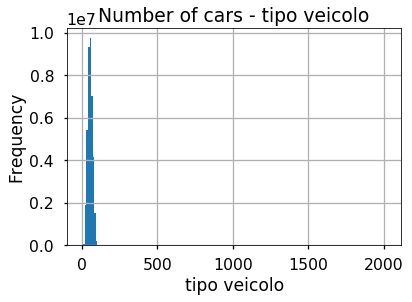

In [48]:
#Generate histograms 

auto.eta_intestatario.hist(bins=200)
plt.xlabel('tipo veicolo')
plt.ylabel('Frequency')
plt.title('Number of cars - tipo veicolo');

plt.show();

In [59]:
auto.destinazione.value_counts()

AUTOVETTURA PER TRASPORTO DI PERSONE                     39161407
AUTOCARRO PER TRASPORTO DI COSE                           4151272
AUTOVEIC.TRASP.PROMISCUO PERSONE/COSE                      601596
AUTOCARAVAN                                                279698
AUTOVEICOLO PER TRASPORTO SPECIFICO                        274121
AUTOVEICOLO PER USO SPECIALE                               193042
TRATTORE PER SEMIRIMORCHIO                                 167726
AUTOBUS PER TRASPORTO DI PERSONE                            96479
AUTOVEICOLO USO ESCLUSIVO DI POLIZIA                         7849
TRAS.SPECIFICO PERSONE PART.CONDIZIONI                       4964
TRATTORE STRADALE PER RIMORCHIO                               488
AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO         346
VEICOLO SPECIALE USO AUTOSCUOLA                                77
AUTOVEICOLO PER USO SPECIALE DELLA POLIZIA LOCALE              29
Name: destinazione, dtype: int64

In [60]:
auto.uso.value_counts()

PROPRIO                                  43152207
DI TERZI DA LOCARE SENZA CONDUC.          1150721
DI TERZI CON AUTORIZZAZIONE LIBERA         279608
DI TERZI CON AUTORIZZAZIONI VINCOLATE      212676
DI TERZI                                    80883
DI TERZI DA NOLEGGIO CON CONDUC.            58698
USO SPECIALE                                 4277
PRIV.,LOCAZIONE FAC. COMPERA                    4
Name: uso, dtype: int64

In [61]:
auto.marca.value_counts()

FIAT - INNOCENTI                                                11775799
FORD                                                             3165904
VOLKSWAGEN                                                       2970088
OPEL                                                             2461750
RENAULT                                                          2374495
LANCIA - AUTOBIANCHI                                             1984163
PEUGEOT                                                          1820632
CITROEN                                                          1753210
MERCEDES                                                         1710339
TOYOTA                                                           1598468
ALFA ROMEO                                                       1228028
NISSAN                                                           1201664
AUDI                                                             1149314
IVECO - FIAT                                       

In [52]:
tesla = parco[parco.marca=="TESLA MOTORS"]

In [54]:
len(tesla)

648

In [ ]:
auto_green = 

In [ ]:
parco.sesso.value_counts()

In [5]:
parco.regione_residenza.value_counts()

LOMBARDIA                8214282
LAZIO                    5341091
CAMPANIA                 4591254
SICILIA                  4487250
VENETO                   4052513
EMILIA-ROMAGNA           3859415
PIEMONTE                 3858373
TOSCANA                  3499371
PUGLIA                   3050018
CALABRIA                 1631868
TRENTINO-ALTO-ADIGE      1397194
LIGURIA                  1383184
MARCHE                   1379921
SARDEGNA                 1363193
ABRUZZO                  1170438
FRIULI-VENEZIA_GIULIA    1042494
UMBRIA                    824464
BASILICATA                476862
MOLISE                    289473
VALLE-D'AOSTA             252531
Name: regione_residenza, dtype: int64

In [ ]:
parco.destinazione.value_counts()

### Campi di interesse Parco Macchine: 

- revisione_in_regola, 

- assicurazione_in_regola      

In [4]:
parco.revisione_in_regola.value_counts()

S    39096194
N    13068995
Name: revisione_in_regola, dtype: int64

In [3]:
parco.assicurazione_in_regola.value_counts()

S    38151309
N    14013880
Name: assicurazione_in_regola, dtype: int64

In [ ]:
##
- Dove si trovano le auto con le revisioni da effettuare?
- Dove si trovano le auto con l'assicurazione da affettuare?
- Fare normalizzazione tra abitanti e veicoli
- vedere quali sono le regioni più inquinanti rapporttate con abitanti?

### Auto di lusso 

Metadata Parco circolante Vetture
columnName
columnDataType
 
 
columnDescription
 
progressivo
number
Questa colonna contiene il numero progressivo del veicolo come record nel dataset
tipo veicolo
complex
Questa colonna contiene il tipo di veicolo (A = Autoveicolo, M = Motoveicolo)
 
destinazione
complex
Questa colonna contiene la destinazione del veicolo. Per destinazione del veicolo s'intende la sua utilizzazione in base alle caratteristiche tecniche. (Per A gli autoveicoli: AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO, AUTOVEICOLO USO ESCLUSIVO DI POLIZIA, AUTOVETTURA PER TRASPORTO DI PERSONE, AUTOBUS PER TRASPORTO DI PERSONE, AUTOCARRO PER TRASPORTO DI COSE, AUTOCARAVAN, AUTOVEICOLO PER USO SPECIALE, TRAS.SPECIFICO PERSONE PART.CONDIZIONI, AUTOVEIC. TRASP. PROMISCUO PERSONE/COSE , TRATTORE STRADALE PER RIMORCHIO,TRATTORE PER SEMIRIMORCHIO . Per M i Motoveicoli: QUADRICICLO PER TRASPORTO DI PERSONE, QUADRICICLO PER TRASPORTO DI COSE, QUADRICICLO PER USO SPECIALE,
QUADRICICLO TRASPORTO SPECIFICO, MOTOVEICOLO USO ESCLUSIVO DI POLIZIA, TRICICLO PER TRASPORTO PROMISCUO, TRICICLO PER USO SPECIALE, TRICICLO PER TRASPORTO SPECIFICO, MOTOCICLO PER TRASPORTO PERSONE, TRICICLO PER TRASPORTO COSE, TRICICLO PER TRASPORTO DI PERSONE.
uso
string
Questa colonna contiene il tipo d'uso del veicolo. Per uso del veicolo s'intende la sua utilizzazione economica. I veicoli possono essere adibiti a uso proprio o a uso di terzi. (Proprio, Di terzi da noleggio con conducente, di terzi da locare senza conducente, Di terzi, Di terzi con autorizzazione vincolate, Di terzi con autorizzazione libera, Uso speciale)
comune residenza
complex
 
Questa colonna contiene il comune dove risiede l'intestatario del veicolo
provincia residenza
string
 
Questa colonna contiene la provincia dove risiede l'intestatario del veicolo
età intestatario
string
Questa colonna contiene l'età dell'intestatario del veicolo alla data di produzione del dataset
sesso
complex
 
Questa colonna contiene il sesso dell'intestatario del veicolo
marca
complex
 
Questa colonna contiene la marca del veicolo
cilindrata
complex
Questa colonna contiene la cilindrata del veicolo misurata in centimetro cubo (cm3).
 
alimentazione
string
Questa colonna contiene l'alimentazione del motore del veicolo, ossia il tipo di combustibile (GASOLIO/METANO, GASOLIO/GPL, BENZINA, BENZINA/OLIO, BENZINA/WANK, ELETTRICA, GASOLIO, GPL, BENZINA/GPL, BENZINA/METANO, METANO, MISCELA,PETROLIO,IBRIDO BENZINA/ELETTRICO, IBRIDO GASOLIO/ELETTRICO, BENZINA/ETANOLO)
data immatricolazione
string
Questa colonna contiene la data di immatricolazione del veicolo
classe euro
string
Questa colonna contiene la classe ambientale di appartenenza (categoria Euro) di autoveicoli (pre-Euro 1, Euro 1, Euro 2, Euro 3, Euro 4, Euro 5, Euro 6) e motoveicoli (pre-Euro 1, Euro 1, Euro 2, Euro 3) definita dalle direttive europee rispettate nell'anno di produzione e che è riportata nel libretto di circolazione.
emissioni co2
string
Questa colonna contiene l’emissione CO2 del veicolo misurate in g/km ossia grammi al chilometro.
 
massa complessiva: Questa colonna contiene la massa complessiva del veicolo misurata attraverso il suo peso in chilogrammi (Kg). Si definisce massa complessiva la massa del veicolo in ordine di marcia (tara) più tutto il suo carico (portata).
revisone in regola s/n
string
 
Questa colonna contiene lo stato dell'obbligo di revisione del veicolo (S= SI, N=NO) ai fini della circolazione.
 
assicurazione in regola s/n
 
 
string
 
Questa colonna contiene lo stato dell'obbligo dell'assicurazione del veicolo (S= SI, N=NO) ai fini della circolazione.